In [100]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [101]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [102]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [103]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [104]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [105]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [106]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [107]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [108]:
        # quick look at data

session.query(Measurement.station, Measurement.prcp, Measurement.tobs).all()

[('USC00519397', 2.0, 18.3),
 ('USC00519397', 0.0, 17.2),
 ('USC00519397', 0.0, 23.3),
 ('USC00519397', 0.0, 24.4),
 ('USC00519397', None, 22.8),
 ('USC00519397', 1.5, 21.1),
 ('USC00519397', 0.0, 17.8),
 ('USC00519397', 0.0, 20.0),
 ('USC00519397', 0.0, 22.8),
 ('USC00519397', 0.3, 17.8),
 ('USC00519397', 0.0, 16.1),
 ('USC00519397', 0.0, 18.9),
 ('USC00519397', 0.0, 18.3),
 ('USC00519397', 0.0, 20.0),
 ('USC00519397', 0.0, 17.8),
 ('USC00519397', 0.0, 22.2),
 ('USC00519397', 0.0, 18.9),
 ('USC00519397', 0.0, 18.9),
 ('USC00519397', 0.0, 20.6),
 ('USC00519397', 0.0, 19.4),
 ('USC00519397', 0.0, 19.4),
 ('USC00519397', 0.3, 21.7),
 ('USC00519397', 0.0, 19.4),
 ('USC00519397', 1.0, 24.4),
 ('USC00519397', 3.0, 20.0),
 ('USC00519397', 0.0, 22.2),
 ('USC00519397', None, 21.1),
 ('USC00519397', 0.8, 19.4),
 ('USC00519397', 0.3, 18.9),
 ('USC00519397', None, 19.4),
 ('USC00519397', 0.3, 20.6),
 ('USC00519397', 0.0, 19.4),
 ('USC00519397', 0.0, 19.4),
 ('USC00519397', 0.0, 17.8),
 ('USC00519

# Exploratory Precipitation Analysis

In [109]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc910217880>,
 'prcp': 2.0,
 'station': 'USC00519397',
 'id': 0,
 'date': '2010-01-01',
 'tobs': 18.3}

In [110]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

meas_date_desc_first = session.query(Measurement).order_by(Measurement.date.desc()).first()
meas_date_desc_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc9758e19f0>,
 'prcp': 0.0,
 'station': 'USC00519397',
 'id': 2723,
 'date': '2017-08-23',
 'tobs': 27.2}

In [111]:
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

date_obj = meas_date_desc_first.date
#date_obj
date_iso = dt.date.fromisoformat(date_obj)
print(date_iso)

#date_strp = dt.datetime.strptime(date_obj, '%Y-%m-%d').date()
#date_strp

#date_out = dt.strptime(date_obj, '%Y-%m-%d')
#date_out = dt.date.fromisoformat(date_obj)
#date_out2 = dt.date.strptime(date_obj, '%Y-%m-%d')

subYearNumber = 1;

prcp_date_1yr_prior = date_iso - relativedelta(years=subYearNumber)
#prcp_date_1yr_prior
prcp_last12months_date = prcp_date_1yr_prior.isoformat()
prcp_last12months_date

2017-08-23


'2016-08-23'

In [113]:
        # this has changed - query now includes Measurement.station as well

prcp_date_last12months_all = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) > prcp_last12months_date).all()
prcp_date_last12months_all

[('USC00519397', '2016-08-24', 2.0, 26.1),
 ('USC00519397', '2016-08-25', 2.0, 26.7),
 ('USC00519397', '2016-08-26', 0.0, 26.1),
 ('USC00519397', '2016-08-27', 0.0, 25.0),
 ('USC00519397', '2016-08-28', 0.3, 25.6),
 ('USC00519397', '2016-08-29', 0.0, 25.6),
 ('USC00519397', '2016-08-30', 0.0, 26.1),
 ('USC00519397', '2016-08-31', 3.3, 26.7),
 ('USC00519397', '2016-09-01', 0.0, 27.2),
 ('USC00519397', '2016-09-02', 0.0, 26.7),
 ('USC00519397', '2016-09-03', 0.0, 26.1),
 ('USC00519397', '2016-09-04', 0.8, 23.9),
 ('USC00519397', '2016-09-05', None, 26.1),
 ('USC00519397', '2016-09-06', None, 24.4),
 ('USC00519397', '2016-09-07', 1.3, 24.4),
 ('USC00519397', '2016-09-08', 0.0, 26.7),
 ('USC00519397', '2016-09-09', 0.8, 26.1),
 ('USC00519397', '2016-09-10', 0.0, 25.6),
 ('USC00519397', '2016-09-11', 1.3, 24.4),
 ('USC00519397', '2016-09-12', 0.0, 25.6),
 ('USC00519397', '2016-09-13', 0.5, 25.6),
 ('USC00519397', '2016-09-14', 33.5, 23.9),
 ('USC00519397', '2016-09-15', 10.7, 26.1),
 ('USC0

In [114]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(prcp_date_last12months_all)
df


,station,date,prcp,tobs
0,USC00519397,2016-08-24,2.0,26.1
1,USC00519397,2016-08-25,2.0,26.7
2,USC00519397,2016-08-26,0.0,26.1
3,USC00519397,2016-08-27,0.0,25.0
4,USC00519397,2016-08-28,0.3,25.6
...,...,...,...,...
2218,USC00516128,2017-08-19,2.3,21.7
2219,USC00516128,2017-08-20,NaN,25.6
2220,USC00516128,2017-08-21,14.2,24.4
2221,USC00516128,2017-08-22,12.7,24.4


In [115]:
renamed_df = df.rename(columns={"date":"Meas_Date", "prcp":"Rainfall", "tobs":"Temp"})
renamed_df
renamed_count = renamed_df.count()
print(renamed_count)

# clean data by removing NaN data. check column sizes
cleaned_df = renamed_df.dropna(how='any')
cleaned_df
cleaned_count = cleaned_df.count()
print(cleaned_count)
# Sort the dataframe by date
df_sorted_by_date = cleaned_df.sort_values(by='Meas_Date', ascending=False)
df_sorted_by_date



station      2223
Meas_Date    2223
Rainfall     2015
Temp         2223
dtype: int64
station      2015
Meas_Date    2015
Rainfall     2015
Temp         2015
dtype: int64


,station,Meas_Date,Rainfall,Temp
2222,USC00516128,2017-08-23,11.4,24.4
1523,USC00519523,2017-08-23,2.0,27.8
1005,USC00514830,2017-08-23,0.0,27.8
359,USC00519397,2017-08-23,0.0,27.2
358,USC00519397,2017-08-22,0.0,27.8
...,...,...,...,...
1524,USC00519281,2016-08-24,54.6,25.0
360,USC00513117,2016-08-24,54.6,24.4
1188,USC00519523,2016-08-24,31.0,26.1
702,USC00514830,2016-08-24,57.9,26.7


<Axes: title={'center': 'Precipitation'}>

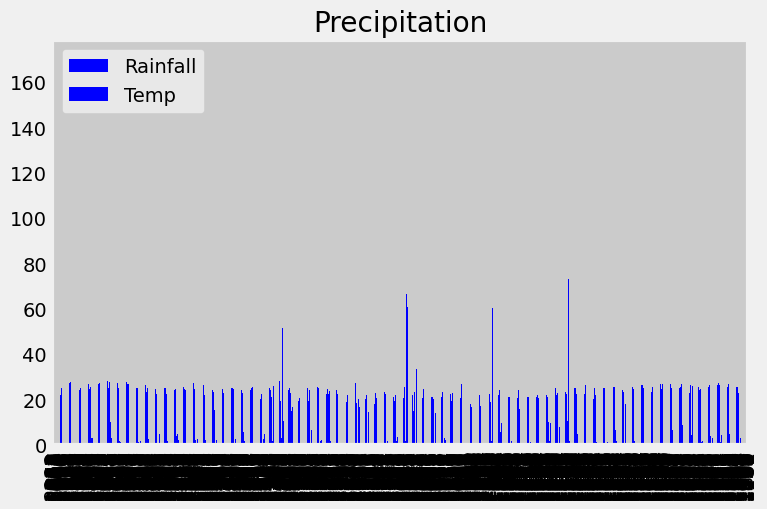

In [116]:
        # first attempt at graph

df_sorted_by_date.plot(kind="bar", facecolor="blue", figsize=(8,5),\
                                 title="Precipitation")


<Axes: title={'center': 'Precipitation'}, xlabel='Meas_Date'>

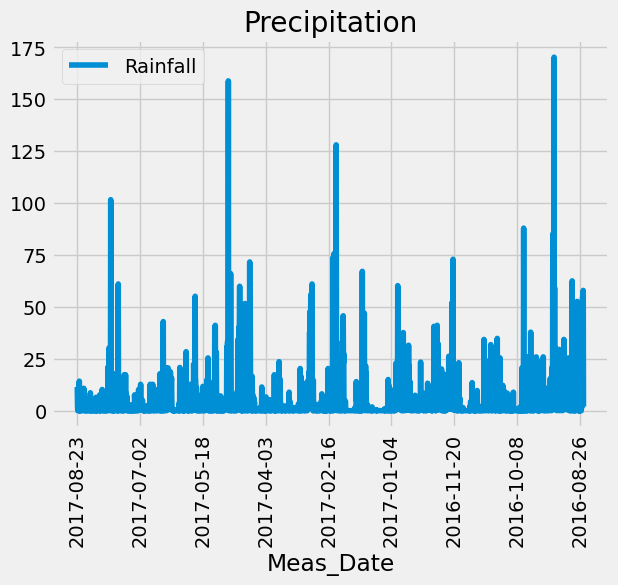

In [117]:
# Use Pandas Plotting with Matplotlib to plot the data

df_sorted_by_date.plot(x="Meas_Date", y="Rainfall", x_compat=True, title="Precipitation", rot=90)

In [118]:
# Use Pandas to calculate the summary statistics for the precipitation data
    
df_sorted_by_date.describe()

,Rainfall,Temp
count,2015.000000,2015.000000
mean,4.485112,23.603573
std,11.690532,2.573815
min,0.000000,14.400000
25%,0.000000,21.700000
50%,0.500000,23.900000
75%,3.300000,25.600000
max,170.200000,30.600000


In [119]:
        # original request headings used in above data frames for analysis

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [120]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [121]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Measurement.station).distinct().count()
num_stations

9

In [122]:
station_data = session.query(Station).first()
station_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc958786c50>,
 'id': 0,
 'elevation': 0.914,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US'}

In [123]:
station_list = session.query(Station.station).distinct().all()
station_list

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [124]:
        # My test
# test to see if I can sum rainfall for each station - uses the initial Measurement table

session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).all()

[('USC00511918', 2362.099999999996),
 ('USC00513117', 9728.700000000037),
 ('USC00514830', 5962.8000000000475),
 ('USC00516128', 27136.69999999987),
 ('USC00517948', 1104.0999999999985),
 ('USC00518838', 1801.6999999999964),
 ('USC00519281', 14962.19999999989),
 ('USC00519397', 3354.4000000000215),
 ('USC00519523', 7518.500000000056)]

In [125]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

# List the stations and their counts in descending order.


# https://stackoverflow.com/questions/35132463/sqlalchemy-core-order-by-desc
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
# https://campus.datacamp.com/courses/introduction-to-relational-databases-in-python/applying-filtering-ordering-and-grouping-to-queries?ex=11
# https://stackoverflow.com/questions/31452174/sqlalchemy-group-by-and-sum

# This uses the 'Measurement' table

from sqlalchemy import desc

count_stations = session.query(Measurement.station, func.count(Measurement.station).label("station_count")).\
    group_by(Measurement.station).\
    order_by(desc("station_count")).\
    all()
count_stations





[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [126]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


main_station = cleaned_df.loc[cleaned_df['station'] == 'USC00519281']
main_station


,station,Meas_Date,Rainfall,Temp
1524,USC00519281,2016-08-24,54.6,25.0
1525,USC00519281,2016-08-25,1.5,26.7
1526,USC00519281,2016-08-26,0.3,26.7
1527,USC00519281,2016-08-27,3.0,23.9
1528,USC00519281,2016-08-28,15.2,22.8
...,...,...,...,...
1870,USC00519281,2017-08-14,0.0,25.0
1871,USC00519281,2017-08-15,8.1,25.0
1872,USC00519281,2017-08-16,3.0,24.4
1873,USC00519281,2017-08-17,0.3,24.4


In [138]:
# calculate avg temp for the most active station
main_station_temp_avg = round(main_station["Temp"].mean(), 2)
print("main_station_avg:", main_station_temp_avg)

# https://stackoverflow.com/questions/65277758/float-object-has-no-attribute-round
# https://stackoverflow.com/questions/25272024/round-each-number-in-a-python-pandas-data-frame-by-2-decimals

main_station_avg: 22.83


In [148]:
# calculate max temp for the most active station
main_station_temp_max = main_station["Temp"].max()
main_station_temp_max

28.3

In [140]:
# calculate max temp for the most active station
main_station_temp_min = round(main_station["Temp"].min(), 2)
print("main_station_min:", main_station_temp_min)

main_station_min: 15.0


Text(0.5, 1.0, 'Temperatures for Station USC00519281, last 12 Months')

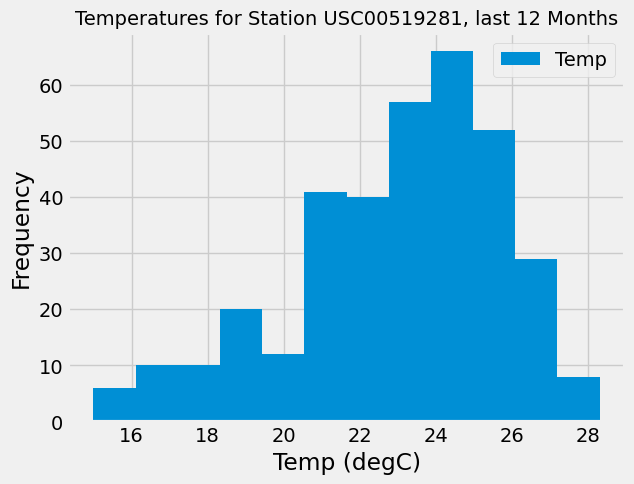

In [157]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ax = main_station["Temp"].plot(kind='hist', bins=12, legend='True')
ax.set_xlabel("Temp (degC)")
ax.set_title("Temperatures for Station USC00519281, last 12 Months", fontsize=14)


# Close Session

In [ ]:
# Close Session
session.close()